# The Sparks Foundation 
## Data Science & Business Analytics
### Task 2- Prediction using Unsupervised ML

Dataset: https://bit.ly/3kXTdox 

The dataset consists of 50 samples from each of three Species of Iris. Four features are sepal length, sepal width, petal length and petal width. 

### Problem Statement: Predict the optimum number of clusters and represent it visually

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
data = pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Size of the dataset
data.shape

(150, 6)

In [4]:
# Types of Species
data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
# Selecting the features
df = data.iloc[:,1:5]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Size of the dataset
df.shape

(150, 4)

In [ ]:
# Prints the information about a dataframe
df.info()

In [8]:
# Calculating the statistical data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [9]:
# Number of null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

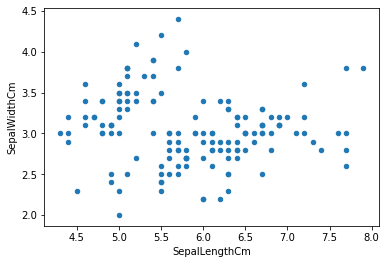

In [10]:
# Visualising the first two columns
df.plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm')

#### Finding optimal number of clusters

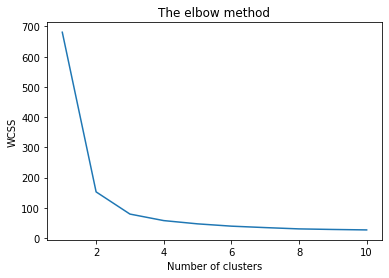

In [11]:
# A list holding the sum of squares values for each k value
# wcss -> Within Cluster Sum of Squares
wcss = []

for no_of_clusters in range(1, 11):
    km = KMeans(n_clusters = no_of_clusters)
    km.fit(df)
    
    wcss.append(km.inertia_)  
    
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

From the above graph we can see that WSS reduces as K keeps on increasing. The most accurate number of clusters according to elbow method is 3.

In [12]:
# Creatining KMeans cluster
km = KMeans(n_clusters=3)

# Target variable
y_predicted = km.fit_predict(df)
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
centroids= km.cluster_centers_
centroids

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
df['labels'] = y_predicted
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
df.labels.value_counts()

0    62
1    50
2    38
Name: labels, dtype: int64

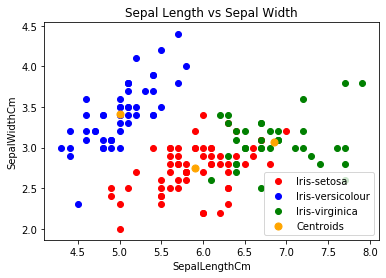

In [16]:
# Visualising the clusters on the first two columns: sepal length and sepal width
df1 = df[df.labels==0]
df2 = df[df.labels==1]
df3 = df[df.labels==2]

plt.scatter(df1.SepalLengthCm, df1.SepalWidthCm, color = 'red', label = 'Iris-setosa')
plt.scatter(df2.SepalLengthCm, df2.SepalWidthCm, color = 'blue', label = 'Iris-versicolour')
plt.scatter(df3.SepalLengthCm, df3.SepalWidthCm, color = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], s=50, label = 'Centroids', color='orange')
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

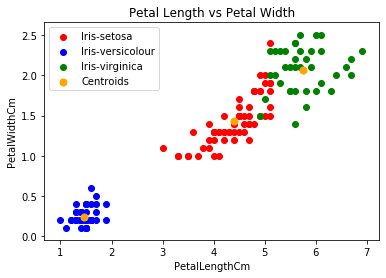

In [17]:
# Visualising the clusters on the Last two columns: Petal length and Petal width
df1 = df[df.labels==0]
df2 = df[df.labels==1]
df3 = df[df.labels==2]

plt.scatter(df1.PetalLengthCm, df1.PetalWidthCm, color = 'red', label = 'Iris-setosa')
plt.scatter(df2.PetalLengthCm, df2.PetalWidthCm, color = 'blue', label = 'Iris-versicolour')
plt.scatter(df3.PetalLengthCm, df3.PetalWidthCm, color = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], s=50, label = 'Centroids', color='orange')
plt.title('Petal Length vs Petal Width')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

In [18]:
data['SepalLengthCm'].corr(data['SepalWidthCm'])

-0.10936924995064937

In [19]:
data['PetalLengthCm'].corr(data['PetalWidthCm'])

0.9627570970509663